In [1]:
# Here I will be looking at the Recruit Restaurant Visitor Forecasting dataset from Kaggle

In [2]:
# From data source:

# -Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online

# -AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

# Files:
    
# air_reserve.csv - This file contains reservations made in the air system. Note that the reserve_datetime indicates the time when the reservation was created, whereas the visit_datetime is the time in the future where the visit will occur.

# hpg_reserve.csv - This file contains reservations made in the hpg system.

# air_store_info.csv - This file contains information about select air restaurants. Column names and contents are self-explanatory.

# hpg_store_info.csv - This file contains information about select hpg restaurants. Column names and contents are self-explanatory.

# store_id_relation.csv - This file allows you to join select restaurants that have both the air and hpg system.

# air_visit_data.csv - This file contains historical visit data for the air restaurants.

# date_info.csv - This file gives basic information about the calendar dates in the dataset.


In [3]:
import os,sys
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import descartes
import geopandas as gpd

In [4]:
air_reserve = pd.read_csv('../Datasets/restaurants_japan/air_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
air_store = pd.read_csv('../Datasets/restaurants_japan/air_store_info.csv')
hpg_reserve = pd.read_csv('../Datasets/restaurants_japan/hpg_reserve.csv',parse_dates=['visit_datetime','reserve_datetime'])
hpg_store = pd.read_csv('../Datasets/restaurants_japan/hpg_store_info.csv')
air_visit = pd.read_csv('../Datasets/restaurants_japan/air_visit_data.csv')
store_id_relation = pd.read_csv('../Datasets/restaurants_japan/store_id_relation.csv')
date_info = pd.read_csv('../Datasets/restaurants_japan/date_info.csv')

In [5]:
# We can combine the air and hpg csvs into singular dataframes

In [6]:
df_hpg = pd.merge(hpg_reserve, hpg_store, on='hpg_store_id')
df_air = pd.merge(air_reserve, air_store, on='air_store_id')

In [7]:
df_hpg_relation = pd.merge(df_hpg,store_id_relation, how='left', on = 'hpg_store_id')
df_air_relation = pd.merge(df_air,store_id_relation, how='left', on = 'air_store_id')

In [8]:
# Merge all

df_full = pd.merge(df_hpg_relation,df_air_relation, how='outer')

In [9]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi


In [10]:
# Change dates to ensure datetime objects
df_air['visit_datetime'] = pd.to_datetime(df_air['visit_datetime'])
df_air['reserve_datetime'] = pd.to_datetime(df_air['reserve_datetime'])
df_hpg['visit_datetime'] = pd.to_datetime(df_hpg['visit_datetime'])
df_hpg['reserve_datetime'] = pd.to_datetime(df_hpg['reserve_datetime'])
df_full['visit_datetime'] = pd.to_datetime(df_full['visit_datetime'])
df_full['reserve_datetime'] = pd.to_datetime(df_full['reserve_datetime'])

In [11]:
# Cumulating the reserve times and visit, adding up all the visitors
cum_df_reserve = df_full.groupby(['reserve_datetime']).sum().sort_values(by=['reserve_datetime'],ascending=True)
cum_df_visit = df_full.groupby(['visit_datetime']).sum().sort_values(by=['visit_datetime'],ascending=True)


In [12]:
cum_df_reserve.head()

,reserve_visitors,latitude,longitude
reserve_datetime,,,
2016-01-01 00:00:00,90,704.917747,2642.569365
2016-01-01 01:00:00,57,415.084550,1509.784428
2016-01-01 02:00:00,15,195.043211,701.673945
2016-01-01 03:00:00,27,174.709774,686.295219
2016-01-01 04:00:00,40,211.888717,818.645405


In [13]:
cum_df_visit.head()

,reserve_visitors,latitude,longitude
visit_datetime,,,
2016-01-01 13:00:00,3,34.692109,135.191698
2016-01-01 17:00:00,35,471.788971,1790.502448
2016-01-01 18:00:00,84,876.081696,3401.770555
2016-01-01 19:00:00,106,1239.450177,4759.756826
2016-01-01 20:00:00,26,321.175790,1224.093007


In [14]:
# Doing some clustering


# There are 8 regions in Japan -> 8 clusters: https://en.wikipedia.org/wiki/List_of_regions_of_Japan

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12).fit(df_full[['longitude','latitude']])
df_full['cluster'] = kmeans.predict(df_full[['longitude','latitude']])
cluster_centers = kmeans.cluster_centers_

In [15]:
# This is the location of the centers of clusters
cluster_centers

array([[139.67880953,  35.67611687],
       [132.4666604 ,  34.3944754 ],
       [141.32933868,  43.00328219],
       [135.43606403,  34.68915406],
       [130.5142751 ,  33.6349562 ],
       [140.87764688,  38.27511918],
       [138.45335351,  34.99171211],
       [139.00348924,  37.81631394],
       [134.80913001,  34.76678922],
       [142.55745313,  43.69576837],
       [137.73607962,  34.71927621],
       [133.36215122,  34.48923642]])

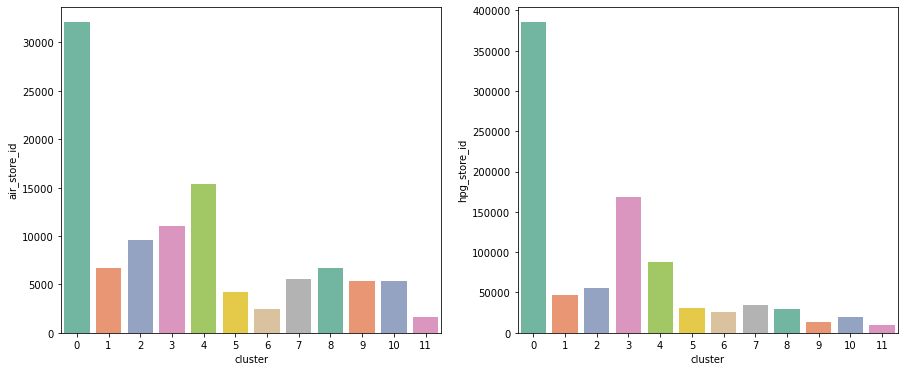

In [16]:
# Looking at cluster histograms
fig,ax = plt.subplots(1,2,figsize=(15,6))
cluster_histogram = df_full.groupby(['cluster'],as_index=False).count()
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['air_store_id'],ax=ax[0], palette= "Set2")
sns.barplot(x=cluster_histogram['cluster'],y=cluster_histogram['hpg_store_id'],ax=ax[1], palette= "Set2")
plt.show()

In [17]:
cluster_histogram

,cluster,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name
0,0,385196,401934,401934,401934,372936,372936,401934,401934,32094,28998,28998
1,1,47429,50225,50225,50225,44175,44175,50225,50225,6649,6050,6050
2,2,55174,59459,59459,59459,51135,51135,59459,59459,9588,8324,8324
3,3,168854,176223,176223,176223,166805,166805,176223,176223,11074,9418,9418
4,4,87283,96026,96026,96026,82756,82756,96026,96026,15362,13270,13270
5,5,30954,34913,34913,34913,30711,30711,34913,34913,4202,4202,4202
6,6,26115,27398,27398,27398,24981,24981,27398,27398,2417,2417,2417
7,7,34637,36354,36354,36354,32368,32368,36354,36354,5537,3986,3986
8,8,29294,31732,31732,31732,26413,26413,31732,31732,6680,5319,5319
9,9,13542,16092,16092,16092,11910,11910,16092,16092,5364,4182,4182


In [18]:
# Defining cluster count
cluster_count = cluster_histogram['cluster'].count()

In [19]:
# Define a base map
japan_map = gpd.read_file("../Datasets/restaurants_japan/Igismap/Japan_Boundary.shp")

In [20]:
# Defining colormaps for clusters
cm = plt.get_cmap('Set2')
colors = [cm(2.*i/cluster_count) for i in range(cluster_count)]
colored = [colors[i] for i in df_full['cluster']]

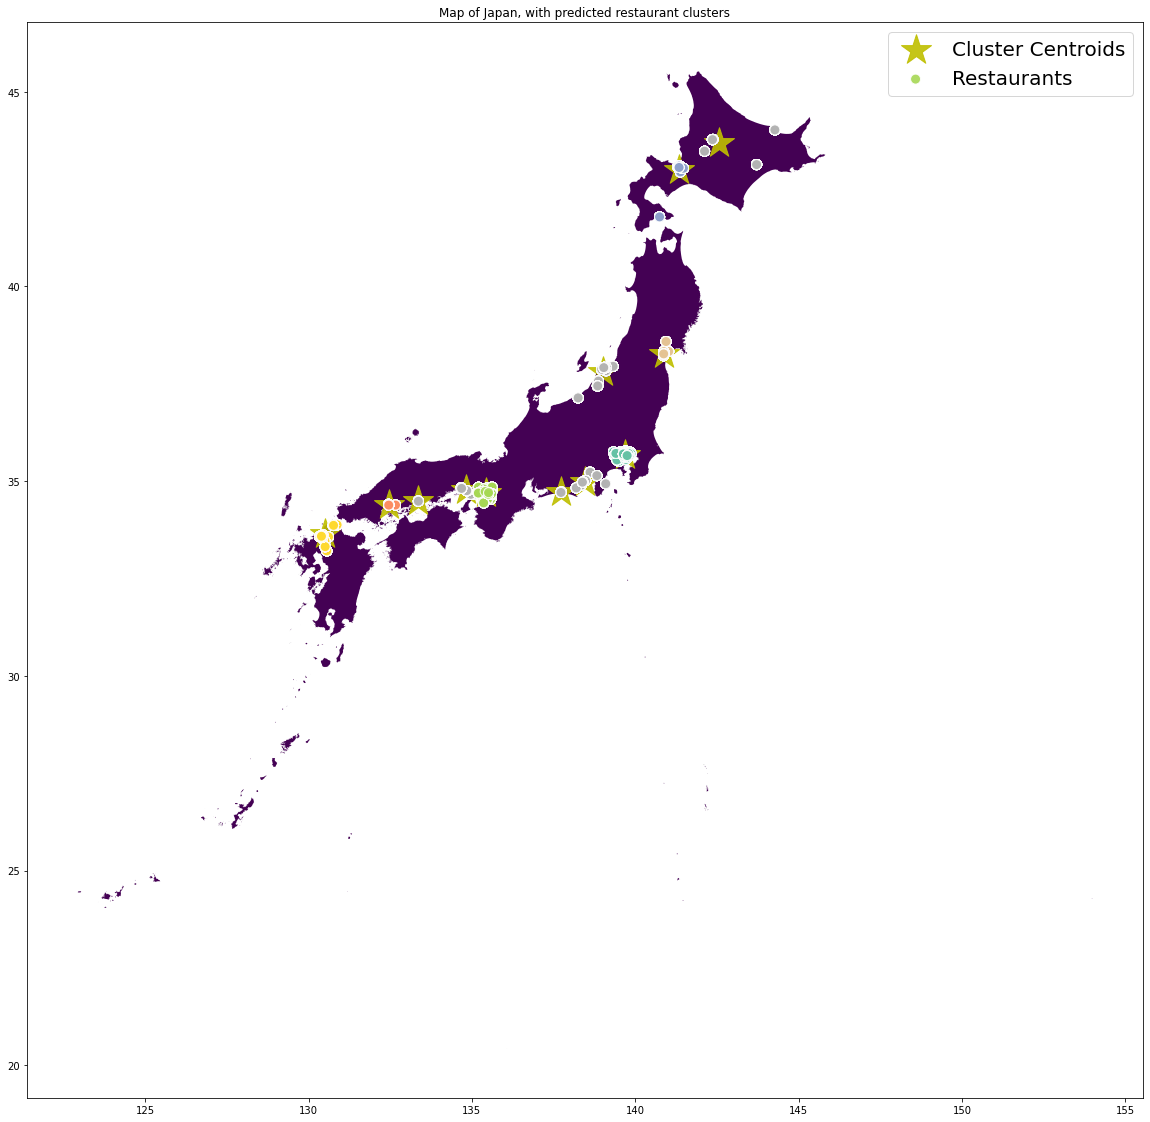

In [21]:

fig,ax = plt.subplots(figsize = (20,20))
# Base map
ax1 = japan_map.plot(ax = ax,cmap = 'viridis')
# Plotting cluster centroids 
x = cluster_centers[:,0]
y = cluster_centers[:,1]
ax2 = ax.scatter(x,y ,c= 'y', s = 1000,alpha = 0.9, edgecolors='y', label = 'Cluster Centroids', marker='*')
# Plotting restaurants 
x2 = df_full['longitude']
y2 = df_full['latitude']
ax3 = ax.scatter(x2,y2 ,c= colored, s = 100 , alpha = 0.9,edgecolors='w',label = 'Restaurants')

plt.legend(prop={'size': 20})
plt.title('Map of Japan, with predicted restaurant clusters')


plt.show()

In [22]:
# Looking at aggregations for day of the week, hours of the day

#Group by days
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
week_df_visit = df_full.groupby(df_full['visit_datetime'].dt.day_name()).count().reindex(days)

In [23]:
df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,3


In [24]:
# Looking at times
time_df_visit = df_full
time_df_visit.index = time_df_visit['visit_datetime']

time_df_visit = time_df_visit.drop(['latitude','longitude'], axis = 1)

In [25]:
time_df_visit = time_df_visit.groupby(time_df_visit.index.hour).count()

In [26]:
time_df_visit.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,air_store_id,air_genre_name,air_area_name,cluster
visit_datetime,,,,,,,,,,
0,1082,1308,1308,1308,878,878,450,430,430,1308
1,726,923,923,923,593,593,338,330,330,923
2,278,379,379,379,190,190,191,189,189,379
3,151,198,198,198,80,80,119,118,118,198
4,95,110,110,110,55,55,56,55,55,110


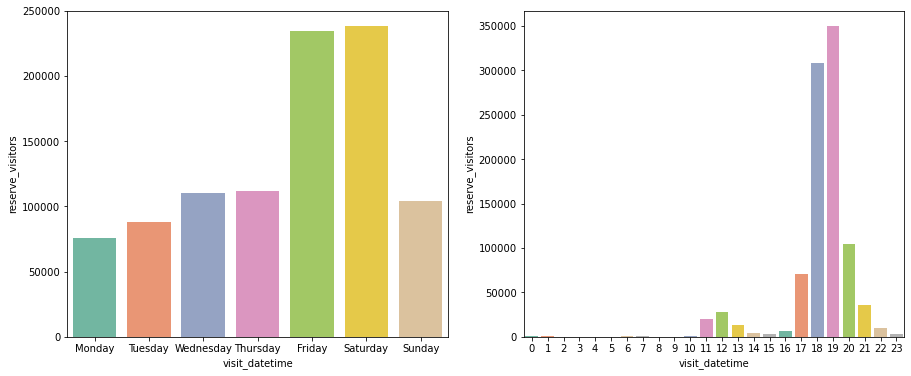

In [27]:
# Looking at time of day and day of week hisograms for actual visitors
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x=week_df_visit.index,y=week_df_visit['reserve_visitors'],ax=ax[0], palette= "Set2")
sns.barplot(x=time_df_visit.index,y=time_df_visit['reserve_visitors'],ax=ax[1], palette= "Set2")
plt.show()

In [28]:
# As expected, Friday and Sturday dinner times are massively more statistically relevant than other times and days

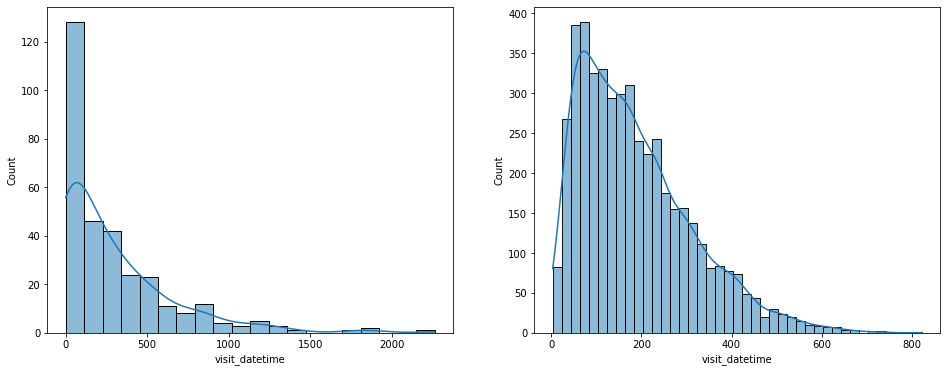

In [29]:
# Distribution of
fig,ax = plt.subplots(1,2,figsize=(16,6))
air_histogram = df_air.groupby(['air_store_id']).count()
sns.histplot(air_histogram['visit_datetime'], kde = True, ax=ax[0])
hpg_histogram = df_hpg.groupby(['hpg_store_id']).count()
sns.histplot(hpg_histogram['visit_datetime'], kde = True, ax=ax[1])
plt.show()

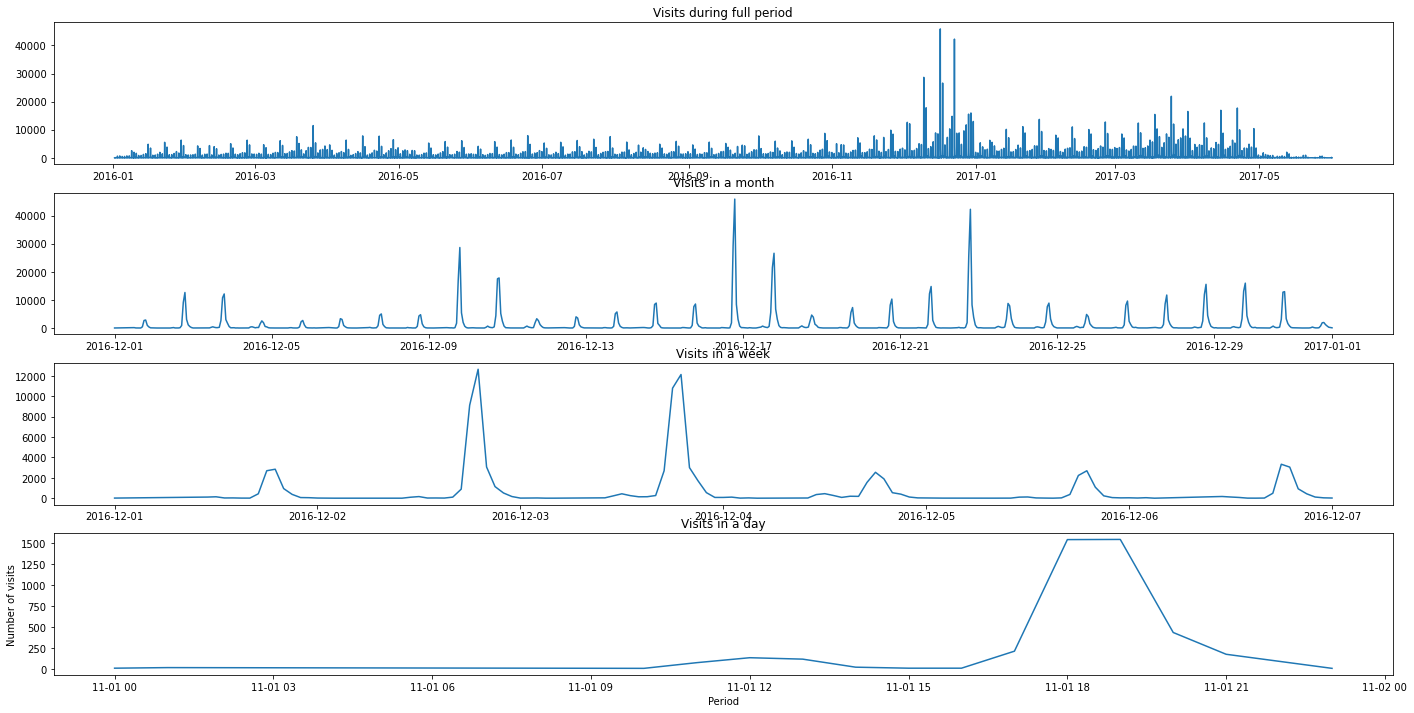

In [30]:
# Number of visits in any given day, month and week

fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize = (24,12))
ax1.plot(cum_df_visit['reserve_visitors'])
ax1.set_title("Visits during full period")
plt.ylabel("Number of visit")
ax2.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'])
ax2.set_title("Visits in a month")
plt.ylabel("Number of visits")
ax3.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'])
ax3.set_title("Visits in a week")
plt.ylabel("Number of visits")
ax4.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'])
ax4.set_title("Visits in a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.show()

In [31]:
# Looking at discrepancy between number of reservations and actual visits for same time ranges

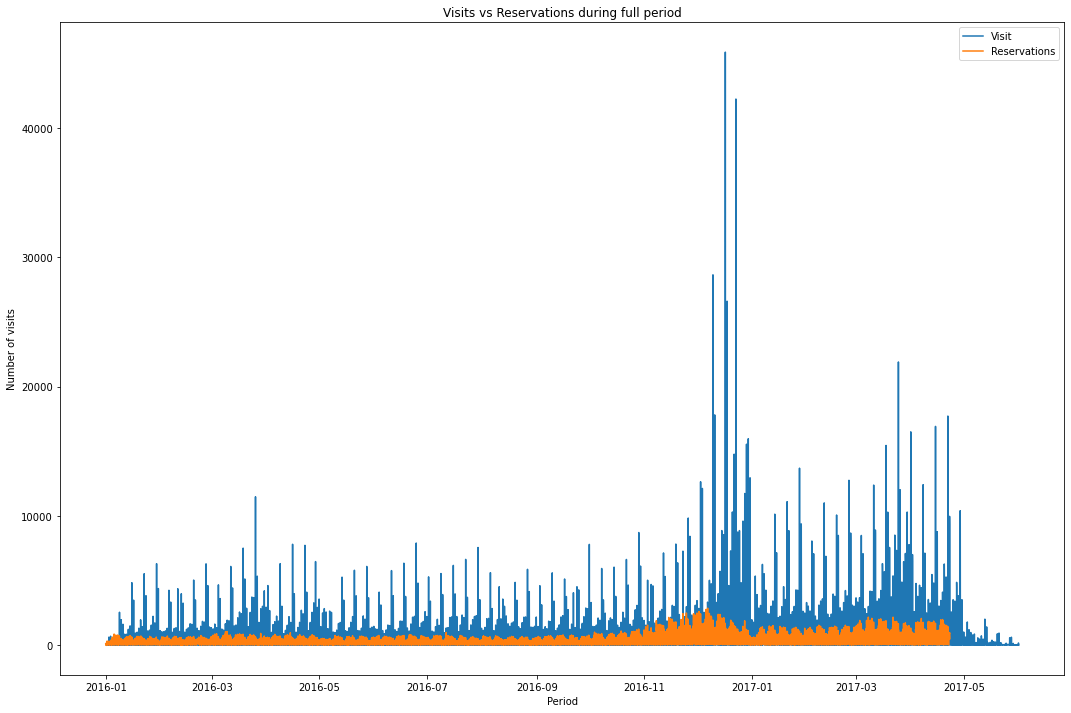

In [32]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during full period")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

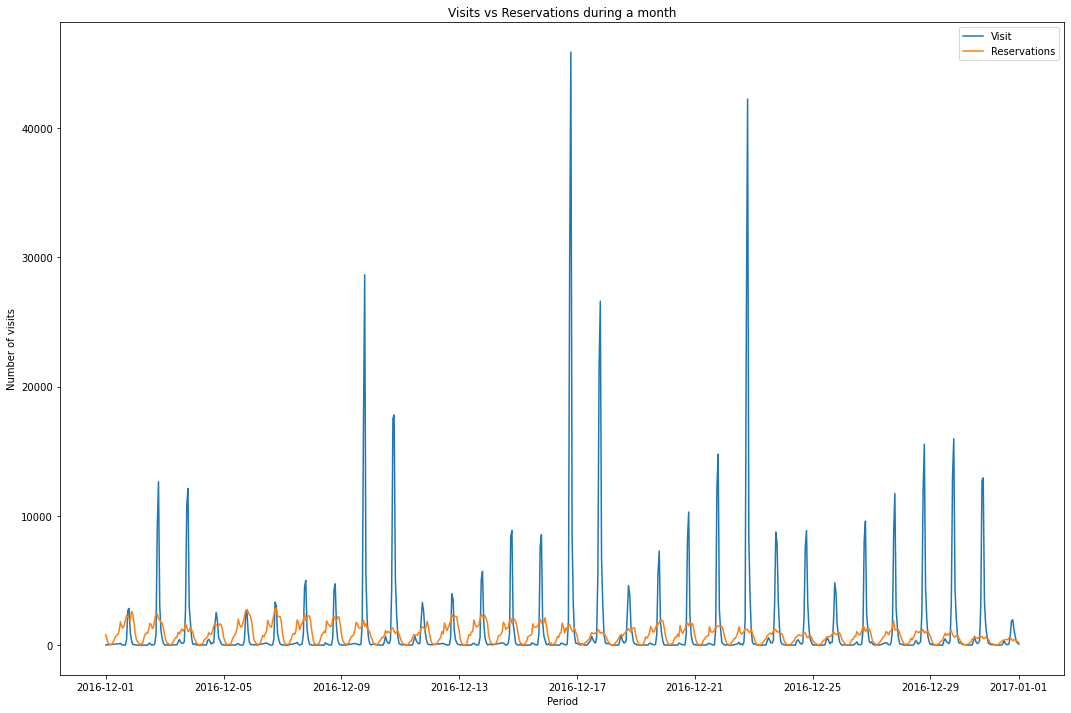

In [33]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2017-01-01 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

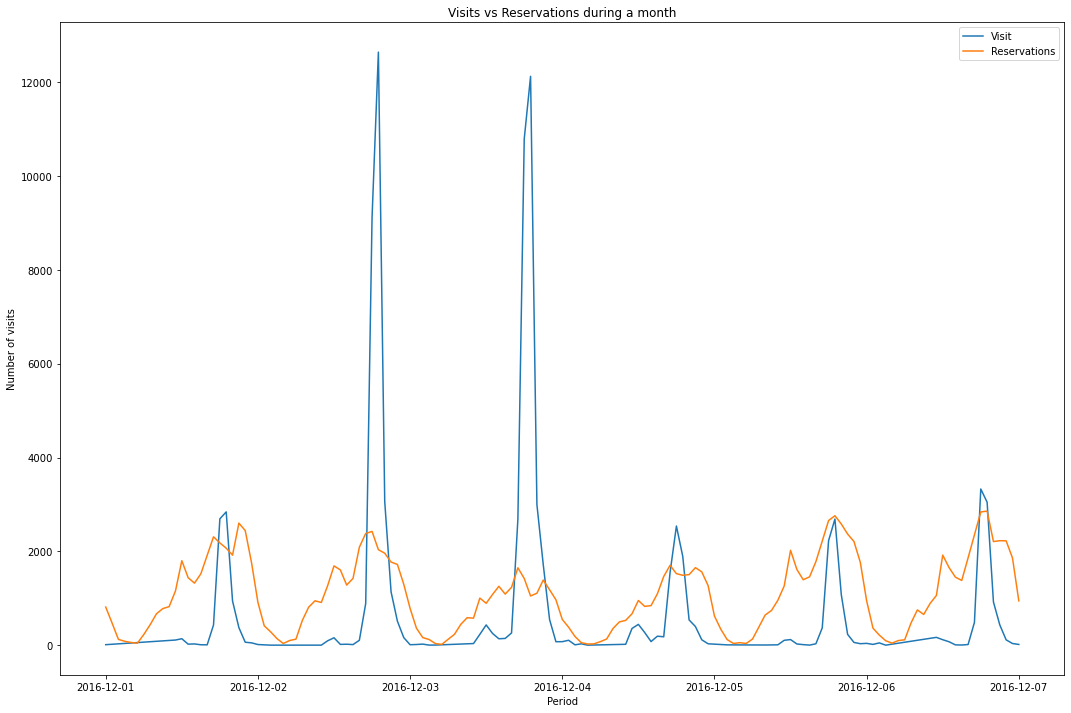

In [34]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-12-01 00:00:00':'2016-12-07 0:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

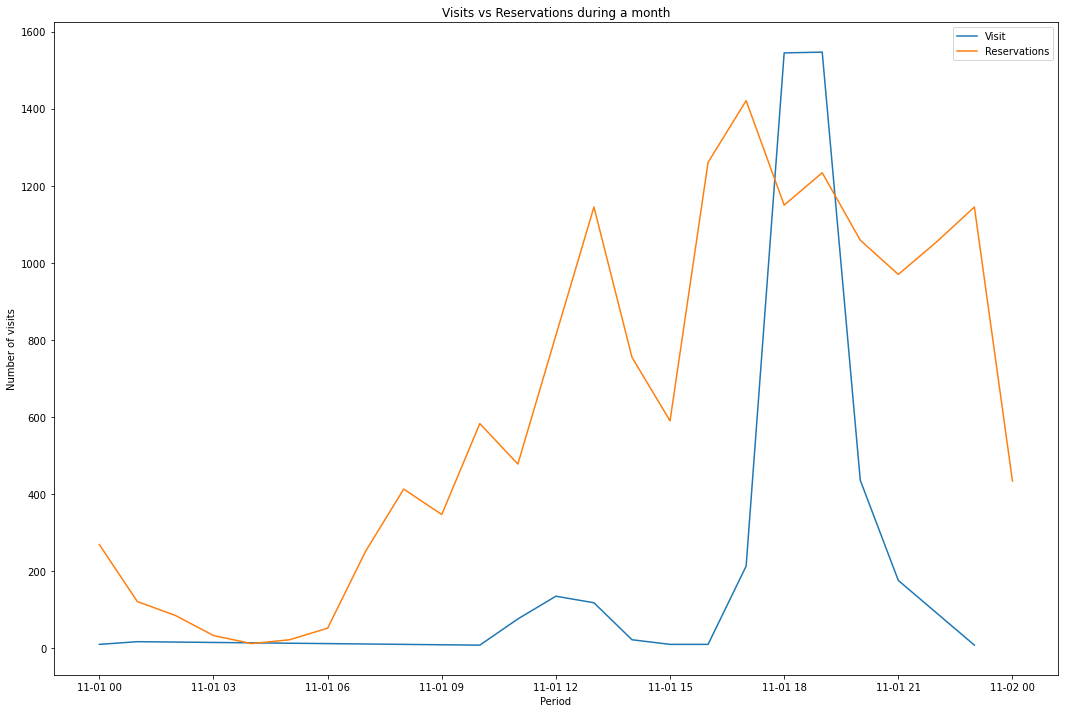

In [35]:
fig,ax1 = plt.subplots(figsize = (18,12))
ax1.plot(cum_df_visit['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Visit')
ax1.plot(cum_df_reserve['reserve_visitors']['2016-11-01 00:00:00':'2016-11-02 00:00:00'], label = 'Reservations')
ax1.set_title("Visits vs Reservations during a month")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [36]:
# Can see that in any given time window, many more people visit instead of reserve.

In [37]:
# Looking at aggregated windows

m1 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.month]).sum()
m1_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.month]).sum()
m2 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.weekday]).sum()
m2_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.weekday]).sum()
m3 = cum_df_visit['reserve_visitors'].groupby(by=[cum_df_visit.index.hour]).sum()
m3_res = cum_df_reserve['reserve_visitors'].groupby(by=[cum_df_reserve.index.hour]).sum()

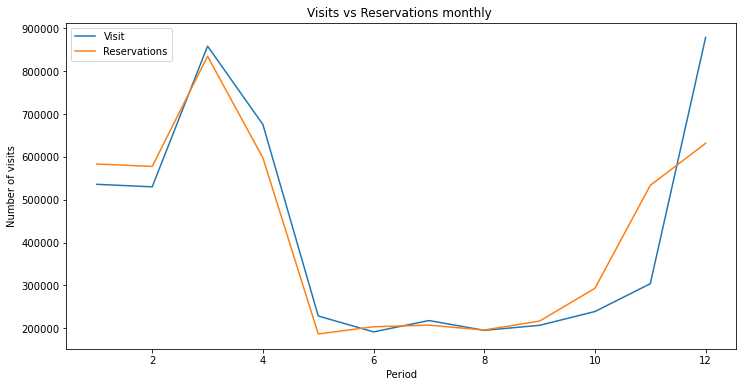

In [38]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m1, label = 'Visit')
ax1.plot(m1_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations monthly ")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [39]:
# Can be seen that this ties in well with the combination of cherry blossom period (march/april) and Christams (dec)

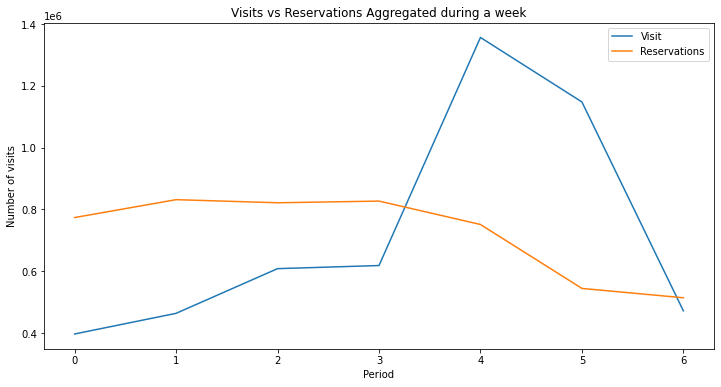

In [40]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m2, label = 'Visit')
ax1.plot(m2_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a week")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

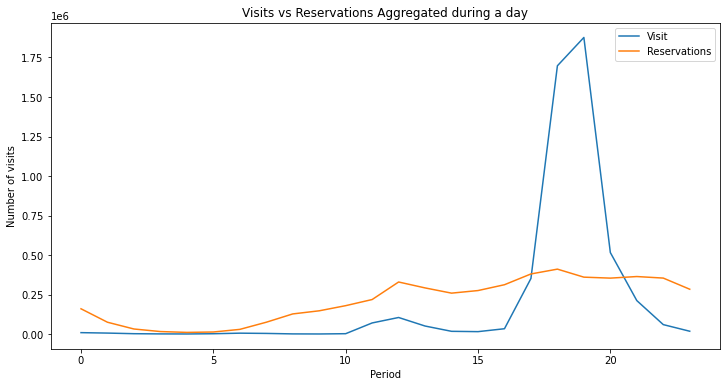

In [41]:
fig,ax1 = plt.subplots(figsize = (12,6))
ax1.plot(m3, label = 'Visit')
ax1.plot(m3_res, label = 'Reservations')
ax1.set_title("Visits vs Reservations Aggregated during a day")
plt.ylabel("Number of visits")
plt.xlabel("Period")
plt.legend()
plt.show()

In [42]:
# Now I'll explore how many visitors per genre

In [43]:
# First with air_genre
air_genre = df_air.groupby(by='air_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

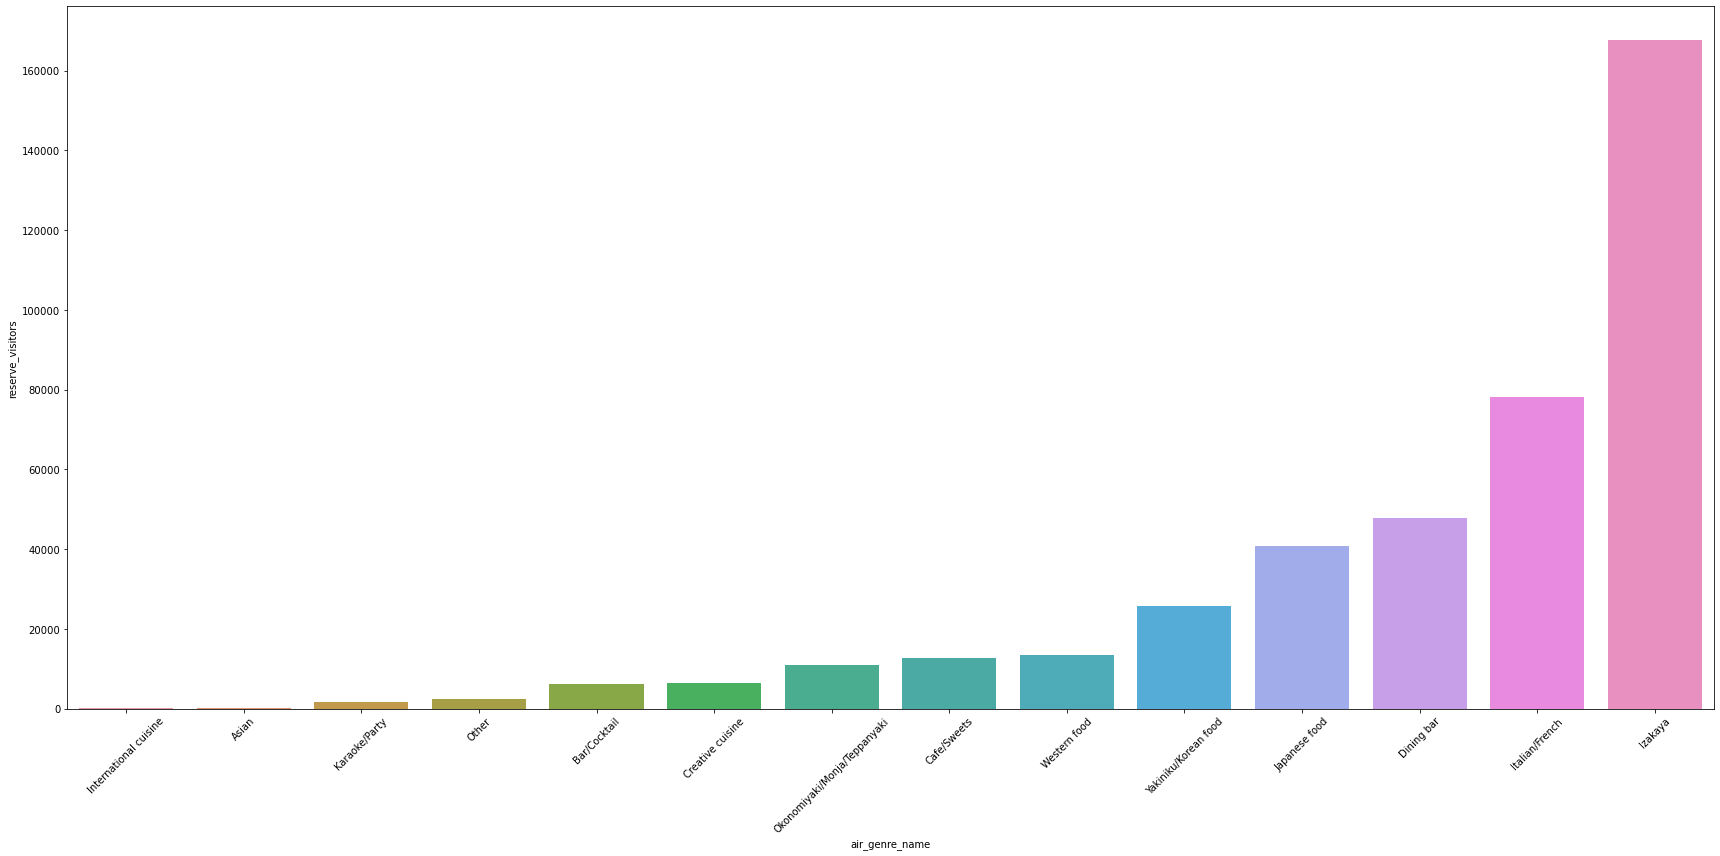

In [44]:
fig, ax = plt.subplots(figsize = (24,12))
sns.barplot(x = air_genre.index, y ='reserve_visitors', data = air_genre)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Then with with hpg_genre
hpg_genre = df_hpg.groupby(by='hpg_genre_name').sum().drop(['latitude', 'longitude'],axis = 1).sort_values(by=['reserve_visitors'],ascending=True)

In [46]:
hpg_genre

,reserve_visitors
hpg_genre_name,
Spain/Mediterranean cuisine,531
Udon/Soba,623
Sweets,795
Shanghai food,1177
Taiwanese/Hong Kong cuisine,1445
Dim Sum/Dumplings,1609
Amusement bar,1966
Sichuan food,2809
Cantonese food,3581


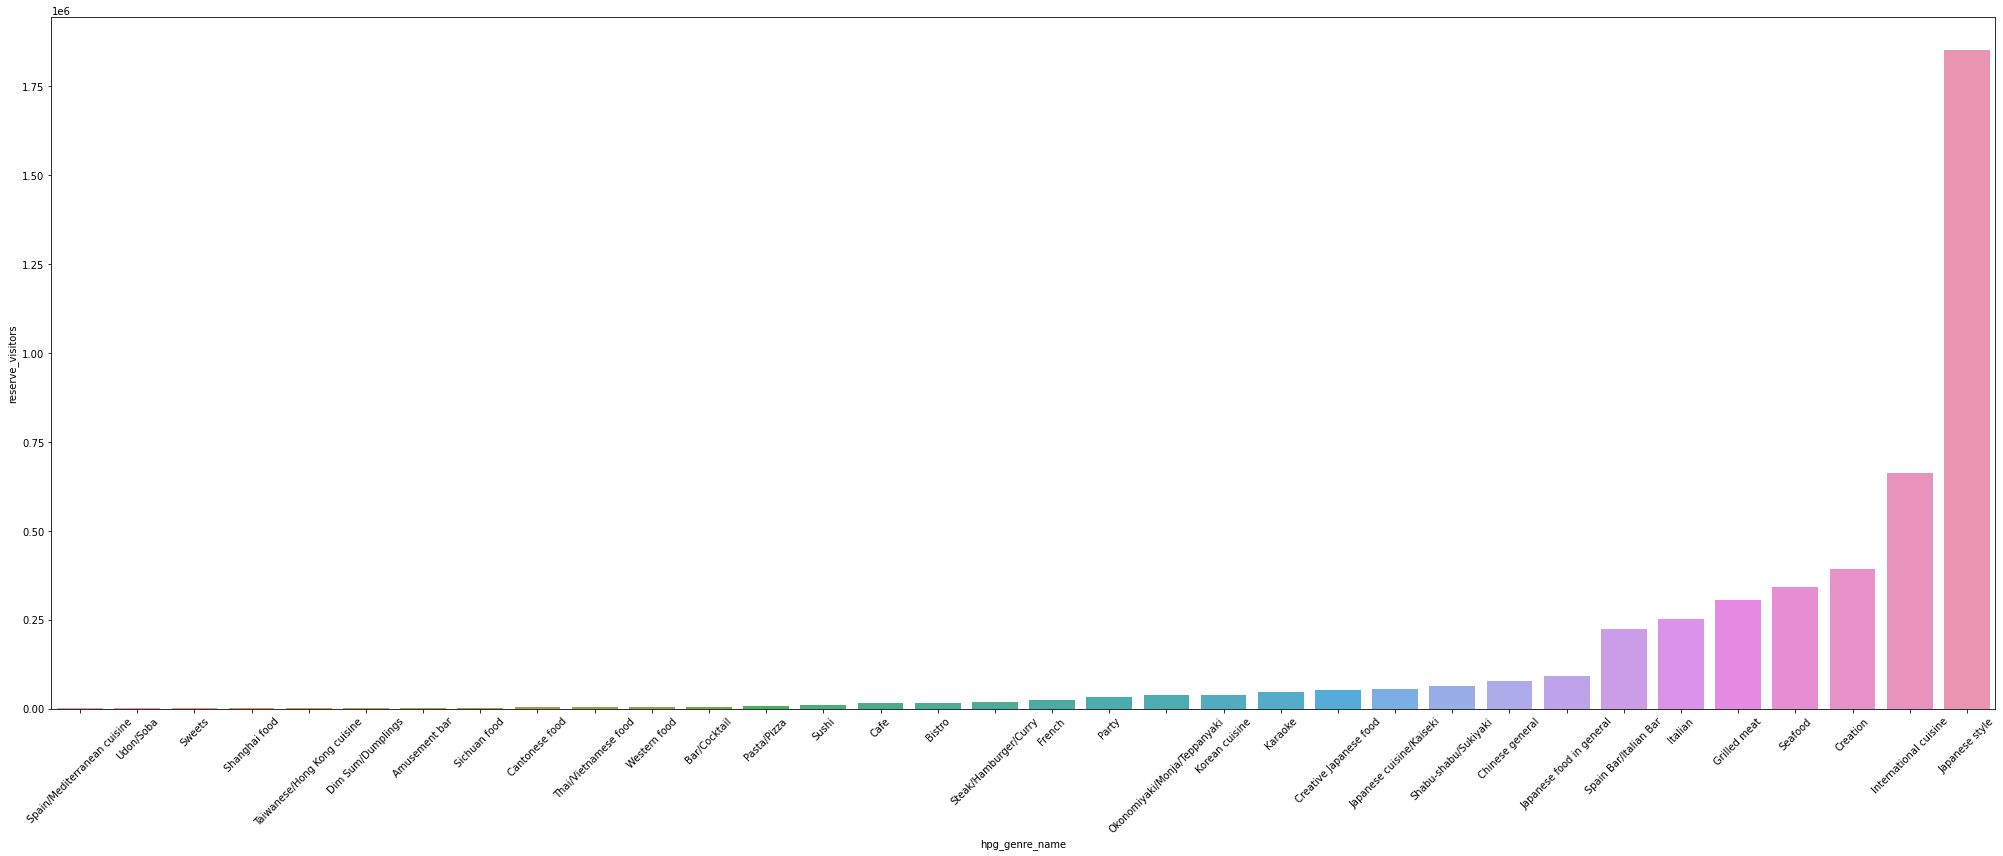

In [47]:
fig, ax = plt.subplots(figsize = (28,12))
sns.barplot(x = hpg_genre.index, y ='reserve_visitors', data = hpg_genre)
plt.xticks(rotation=45)
plt.tight_layout()

In [48]:
# Difference is large between two datasets!

# If you want to start a restaurant, you'd be better off making one that serves japanes food!

In [49]:
# Getting dates which are holidays, but NOT saturday or sunday!
dates = date_info.loc[date_info['holiday_flg']==1].loc[(date_info['day_of_week'] !='Saturday')].loc[date_info['day_of_week'] !='Sunday']
dates.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
10,2016-01-11,Monday,1
41,2016-02-11,Thursday,1
80,2016-03-21,Monday,1
119,2016-04-29,Friday,1


In [50]:
# Making a new feature that states if visit occured on a holiday

In [51]:
#Extracting times and dates from visit and reserves

visit_datetime = pd.to_datetime(df_full['visit_datetime'])
reserve_datetime = pd.to_datetime(df_full['reserve_datetime'])

# Making a new column for visit/reserve dates and time from dt.date/time
df_full['visit_date']=visit_datetime.dt.date
df_full['visit_time']=visit_datetime.dt.time
df_full['reserve_date']=reserve_datetime.dt.date
df_full['reserve_time']=reserve_datetime.dt.time

In [52]:
df_full.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster,visit_date,visit_time,reserve_date,reserve_time
visit_datetime,,,,,,,,,,,,,,,,
2016-01-01 13:00:00,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-01,13:00:00,2016-01-01,06:00:00
2016-01-02 12:00:00,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-02,12:00:00,2016-01-01,20:00:00
2016-01-03 19:00:00,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-03,19:00:00,2016-01-02,15:00:00
2016-01-06 12:00:00,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-06,12:00:00,2016-01-06,08:00:00
2016-01-10 17:00:00,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-10,17:00:00,2016-01-04,22:00:00


In [53]:
date_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   calendar_date  517 non-null    object
 1   day_of_week    517 non-null    object
 2   holiday_flg    517 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 12.2+ KB


In [54]:
# Making a series from calendar_date

dates = pd.to_datetime(date_info['calendar_date'])

In [55]:
days_of_the_week = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

In [56]:
date_info['calendar_date'] = pd.to_datetime(date_info['calendar_date']).dt.date

In [57]:
# Adding day of the week and day of the year to date_info

date_info['day_of_year'] = dates.dt.dayofyear
date_info['day_of_week'] = [days.index(dw) for dw in date_info['day_of_week']]

In [58]:
# Merging the holiday flags with full df!!!

new_df_full = pd.merge(df_full,date_info[['calendar_date','holiday_flg']],how='left',left_on='visit_date',right_on='calendar_date')

In [59]:
# Renaming column from holiday_flg to visit_holiday

new_df_full = new_df_full.rename(index = str, columns = {'holiday_flg':'visit_holiday'})

In [60]:
new_df_full = new_df_full.drop(['calendar_date'],axis=1)

In [61]:
new_df_full

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id,air_genre_name,air_area_name,cluster,visit_date,visit_time,reserve_date,reserve_time,visit_holiday
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-01,13:00:00,2016-01-01,06:00:00,1
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-02,12:00:00,2016-01-01,20:00:00,1
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-03,19:00:00,2016-01-02,15:00:00,1
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-06,12:00:00,2016-01-06,08:00:00,0
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN,NaN,NaN,3,2016-01-10,17:00:00,2016-01-04,22:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963681,NaN,2017-05-16 19:00:00,2017-04-20 19:00:00,3,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0,2017-05-16,19:00:00,2017-04-20,19:00:00,0
963682,NaN,2017-05-21 18:00:00,2017-04-20 19:00:00,4,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0,2017-05-21,18:00:00,2017-04-20,19:00:00,0
963683,NaN,2017-05-21 19:00:00,2017-04-20 19:00:00,2,NaN,NaN,35.658068,139.751599,air_b3a824511477a4ed,Japanese food,Tōkyō-to Minato-ku Shibakōen,0,2017-05-21,19:00:00,2017-04-20,19:00:00,0
963684,hpg_e41e0f2c318dd8e4,2017-04-20 23:00:00,2017-04-20 10:00:00,2,NaN,NaN,34.705362,135.510025,air_cf2229e64408d9fe,Dining bar,Ōsaka-fu Ōsaka-shi Ōgimachi,3,2017-04-20,23:00:00,2017-04-20,10:00:00,0


In [62]:
# Doing the same, but for the reservation info

new_df_full = pd.merge(new_df_full,date_info[['calendar_date','holiday_flg']],how='left',left_on='reserve_date',right_on='calendar_date')
new_df_full = new_df_full.rename(index = str, columns = {'holiday_flg':'reservation_holiday'})
new_df_full = new_df_full.drop(['calendar_date'],axis=1)

In [63]:
# Getting days of the year for visit and reserve dates

new_df_full['visit_date'] = pd.to_datetime(new_df_full['visit_date']).dt.dayofyear
new_df_full['reserve_date'] = pd.to_datetime(new_df_full['reserve_date']).dt.dayofyear

In [64]:
# Can now estimate time between reservations and visits!

time_between_res_vis = visit_datetime-reserve_datetime
delta = time_between_res_vis.dt.days
delta.describe()

count    963686.000000
mean          6.909061
std          11.507296
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         393.000000
dtype: float64

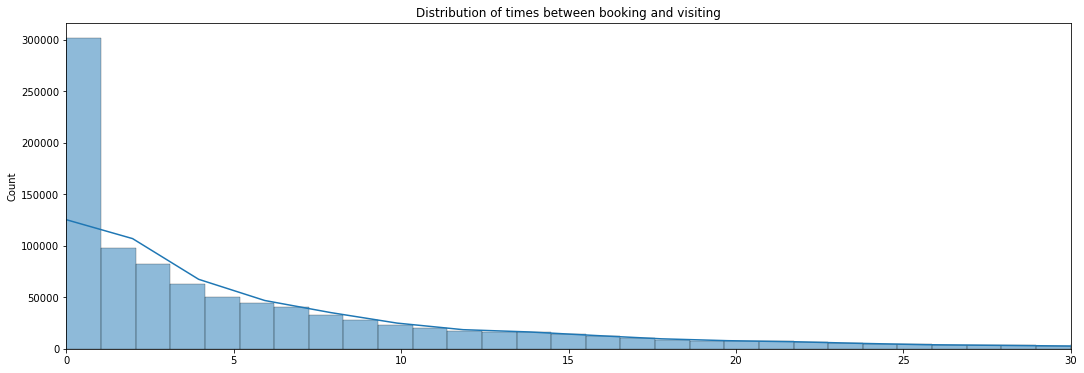

In [65]:
# Making a distribution plot

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.histplot(delta, bins = 380, kde = True)
plt.title('Distribution of times between booking and visiting')
plt.xlim(0,30)
plt.show()

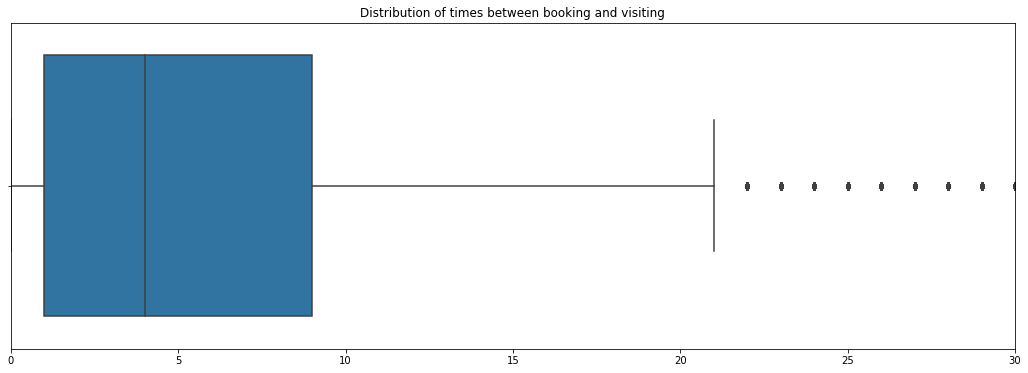

In [66]:
# Making a distribution plot

fig, ax = plt.subplots(figsize = (18,6))
ax = sns.boxplot(x = delta)
plt.title('Distribution of times between booking and visiting')
plt.xlim(0,30)
plt.show()

In [67]:
# Checking vists and reservations during holidays 

holihist_visit = new_df_full[new_df_full['visit_holiday']==1].groupby(['visit_date'],as_index=False).count()
non_holihist_visit = new_df_full[new_df_full['visit_holiday']==0].groupby(['visit_date'],as_index=False).count()
holihist_reserve = new_df_full[new_df_full['visit_holiday']==1].groupby(['reserve_date'],as_index=False).count()
non_holihist_reserve = new_df_full[new_df_full['visit_holiday']==0].groupby(['reserve_date'],as_index=False).count()

In [68]:
# Plotting results!

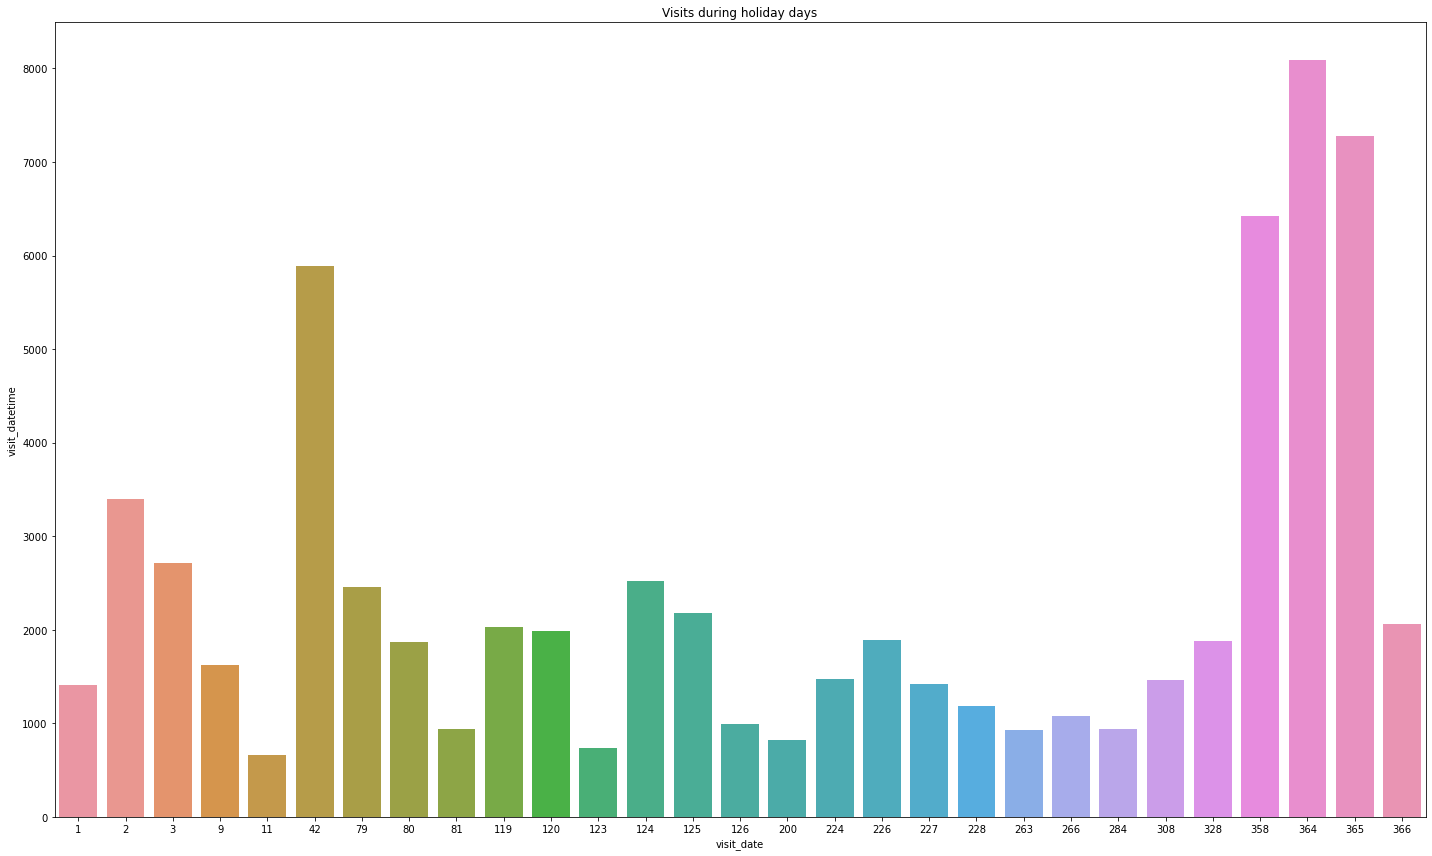

In [69]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = holihist_visit['visit_date'], y=holihist_visit['visit_datetime'])
plt.title('Visits during holiday days')
plt.tight_layout()
plt.show()

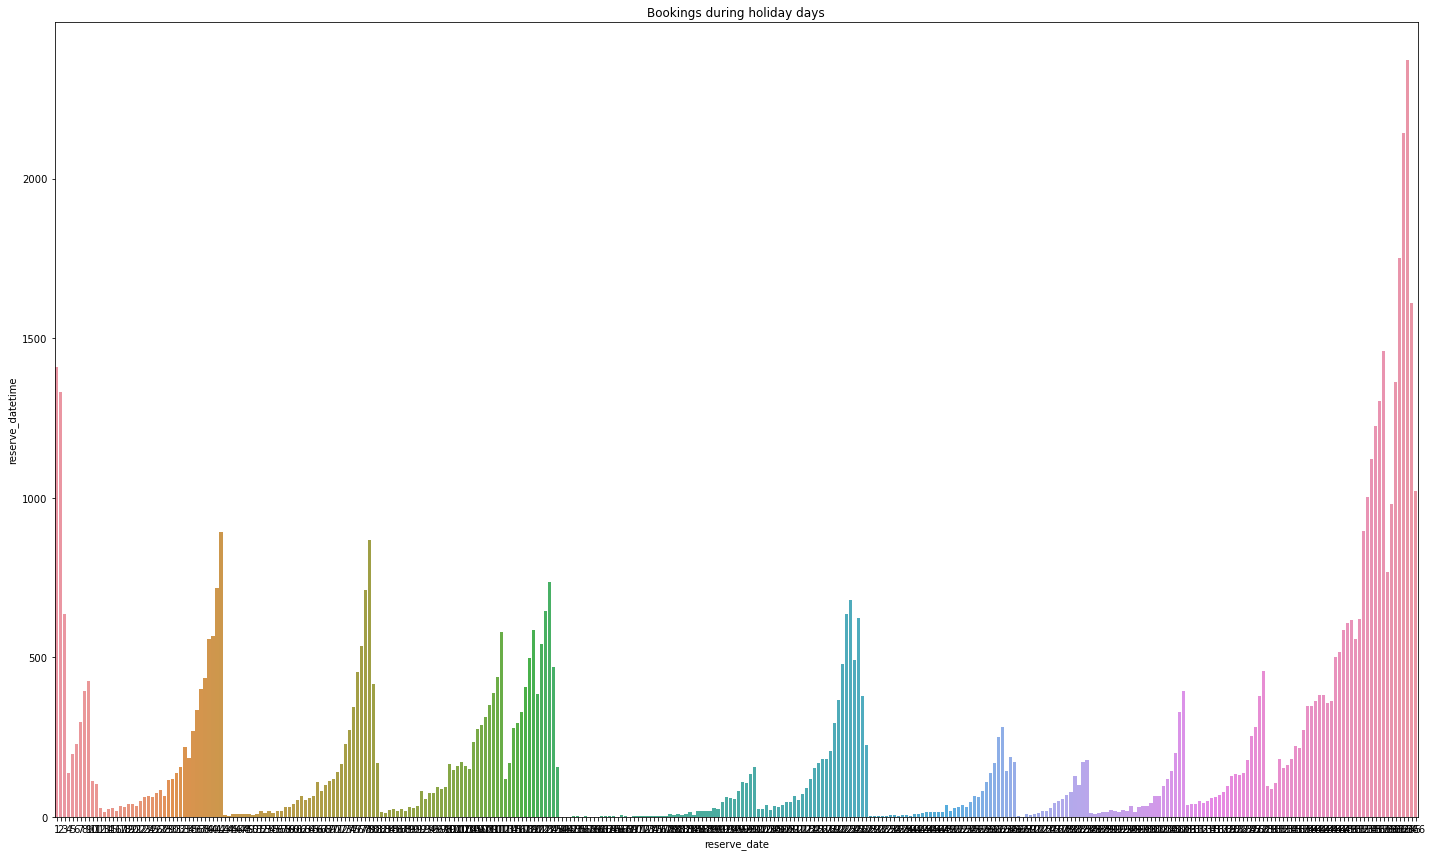

In [70]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = holihist_reserve['reserve_date'], y=holihist_reserve['reserve_datetime'])
plt.title('Bookings during holiday days')
plt.tight_layout()
plt.show()

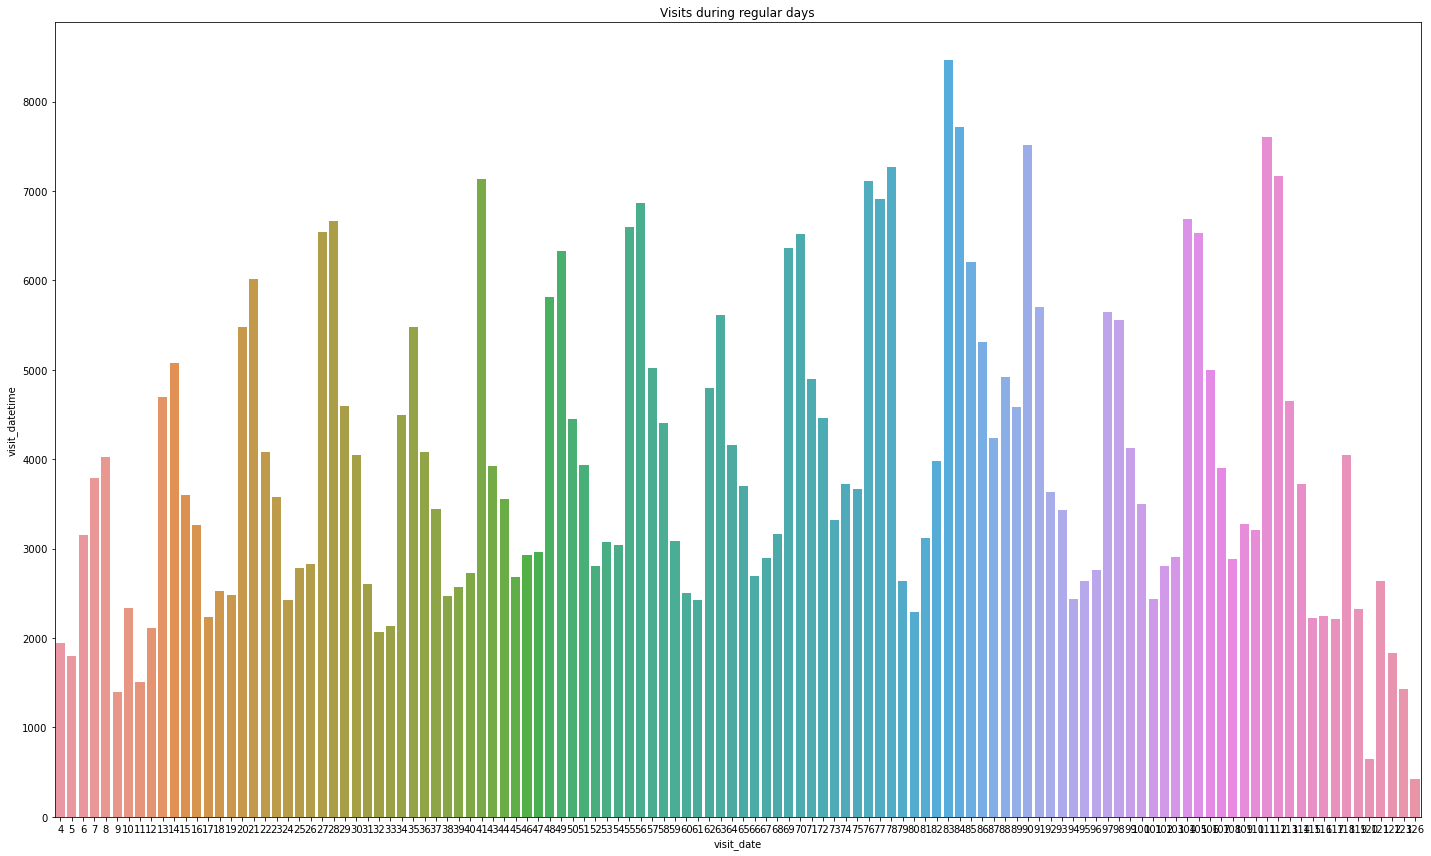

In [71]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = non_holihist_visit['visit_date'][0:120], y=non_holihist_visit['visit_datetime'])
plt.title('Visits during regular days')
plt.tight_layout()
plt.show()

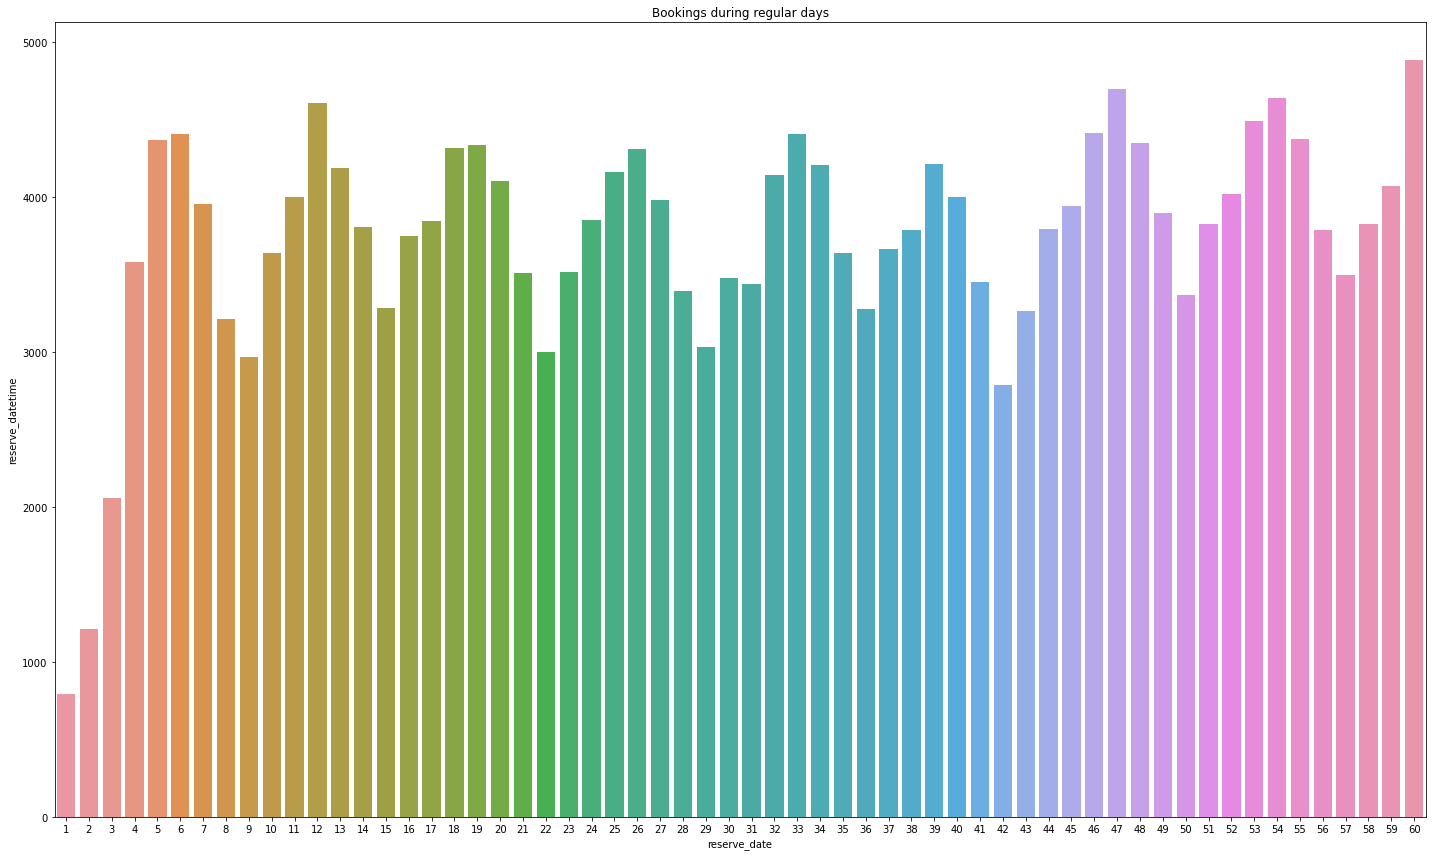

In [72]:
fig,ax = plt.subplots(1,1,figsize=(20,12))
sns.barplot(x = non_holihist_reserve['reserve_date'][0:60], y=non_holihist_reserve['reserve_datetime'])
plt.title('Bookings during regular days')
plt.tight_layout()
plt.show()

In [85]:
# Initialise RNN definitions - making a unified df for reserve and visits

reserve = cum_df_reserve.drop(['latitude','longitude'], axis = 1)
visit = cum_df_visit.drop(['latitude','longitude'], axis = 1)

<AxesSubplot:xlabel='visit_datetime'>

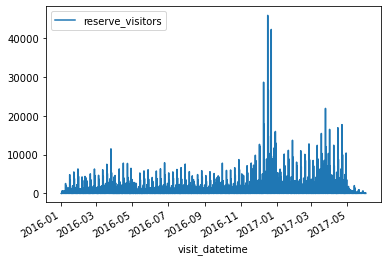

In [122]:
visit.plot()

<AxesSubplot:xlabel='reserve_datetime'>

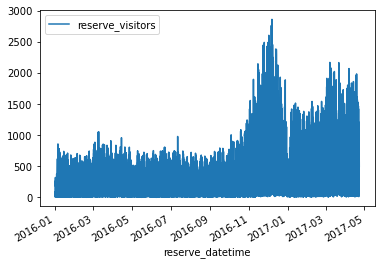

In [123]:
reserve.plot()

In [104]:
# Merging both dfs
unified = pd.merge(reserve,visit,left_index=True, right_index=True,how="outer")

In [129]:
unified = unified.fillna(value=0)

In [130]:
unified.columns=['reservations','visitors']

<AxesSubplot:>

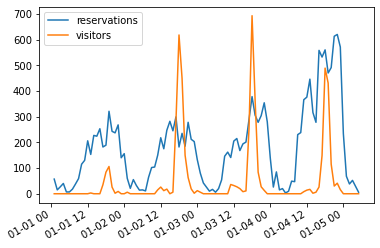

In [131]:
unified[1:100].plot()

In [ ]:
# Now we have reserve, visits and unified for neural network usage

In [167]:
print(len(reserve), len(visit))

11421 8678


In [ ]:
# Starting with Visit df

In [165]:
test_size = int(len(visit)*0.7)

In [166]:
test_size

6074

In [168]:
test_ind = len(visit)- test_size

In [171]:
# Train/test split
train = visit.iloc[:test_ind]
test = visit.iloc[test_ind:]

In [172]:
# Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [214]:
# Using time series generator

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Redefine to get 90 days back and then predict the next month out
length = 7
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [215]:
# What does the first batch look like?
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1.74231205e-04 2.96193048e-03 7.23059500e-03 9.14713825e-03
 2.17789006e-03 8.71156024e-05 6.96924819e-04]
Predict this y: 
 [[0.00043558]]


In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping

# Only using one feature in our time series
n_features = 1

In [200]:
# Define model for visits -LSTM
model_visit = Sequential()
model_visit.add(LSTM(100, activation='tanh', input_shape=(length, n_features)))
model_visit.add(Dense(1))
model_visit.compile(optimizer='adam', loss='mse')
model_visit.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [217]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [218]:
# fitting model
model_visit.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
2597/2597 [==============================] - 19s 7ms/step - loss: 0.0034 - val_loss: 0.0090
Epoch 2/20
2597/2597 [==============================] - 18s 7ms/step - loss: 0.0020 - val_loss: 0.0091
Epoch 3/20
2597/2597 [==============================] - 18s 7ms/step - loss: 0.0019 - val_loss: 0.0086
Epoch 4/20
2597/2597 [==============================] - 19s 7ms/step - loss: 0.0018 - val_loss: 0.0092
Epoch 5/20
2597/2597 [==============================] - 18s 7ms/step - loss: 0.0017 - val_loss: 0.0085
Epoch 6/20
2597/2597 [==============================] - 16s 6ms/step - loss: 0.0016 - val_loss: 0.0074
Epoch 7/20
2597/2597 [==============================] - 16s 6ms/step - loss: 0.0014 - val_loss: 0.0083
Epoch 8/20
2597/2597 [==============================] - 17s 7ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 9/20
2597/2597 [==============================] - 17s 7ms/step - loss: 0.0013 - val_loss: 0.0067
Epoch 10/20
2597/2597 [==============================] - 18s 7ms/step - l

<AxesSubplot:>

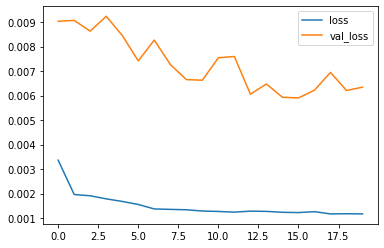

In [219]:
# Visit losses

losses_visit = pd.DataFrame(model_visit.history.history)
losses_visit.plot()

In [220]:
# Define model for visits - GRU
model_visit = Sequential()
model_visit.add(GRU(100, activation='relu', input_shape=(length, n_features)))
model_visit.add(Dense(1))
model_visit.compile(optimizer='adam', loss='mse')
model_visit.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 100)               30900     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
model_visit.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20
2597/2597 [==============================] - 21s 8ms/step - loss: 0.0033 - val_loss: 0.0114
Epoch 2/20
2597/2597 [==============================] - 20s 8ms/step - loss: 0.0020 - val_loss: 0.0094
Epoch 3/20
1283/2597 [=============>................] - ETA: 5s - loss: 0.0021

In [ ]:
# Visit losses

losses_visit = pd.DataFrame(model_visit.history.history)
losses_visit.plot()

In [ ]:
# Selecting GRU going forward...

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [ ]:
test.plot(figsize=(12,8))

In [212]:
test

,reserve_visitors,Predictions
visit_datetime,,
2016-06-02 06:00:00,24,-6.656479e+05
2016-06-02 07:00:00,20,-4.085261e+06
2016-06-02 08:00:00,7,-1.970322e+06
2016-06-02 11:00:00,96,1.441093e+06
2016-06-02 12:00:00,65,5.310839e+06
...,...,...
2017-05-31 18:00:00,171,5.280445e+06
2017-05-31 19:00:00,37,5.280445e+06
2017-05-31 20:00:00,13,5.280445e+06
